In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
# considering only setosa and versicolor and classifing them using svm (binary classifier)
x = iris["data"][:,(2,3)] # only considering petal length and petal width
y = iris["target"]
x = x[(y==0) | (y==1)]
y = y[(y==0) | (y==1)]

In [27]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = "linear", C = float("inf"))
svm_clf.fit(x,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] *x0 - b/w[1]
    margin = 1/w[1]
    gap_up = decision_boundary + margin
    gap_down = decision_boundary - margin
    support_vectors = svm_clf.support_vectors_
    plt.scatter(support_vectors[:,0], support_vectors[:,1], s = 180, facecolor = "red")
    plt.plot(x0, decision_boundary, "k-")
    plt.plot(x0, gap_up, "k--")
    plt.plot(x0, gap_down, "k--")

def plot_data_points(x,y):
    plt.plot(x[:,0][y==1], x[:,1][y==1], "bs", label = "versicolor")
    plt.plot(x[:,0][y==0], x[:,1][y==0], "yo", label = "setosa")
    plt.xlabel("petal length", fontsize = 14)
    plt.ylabel("petal width", fontsize = 14)
    

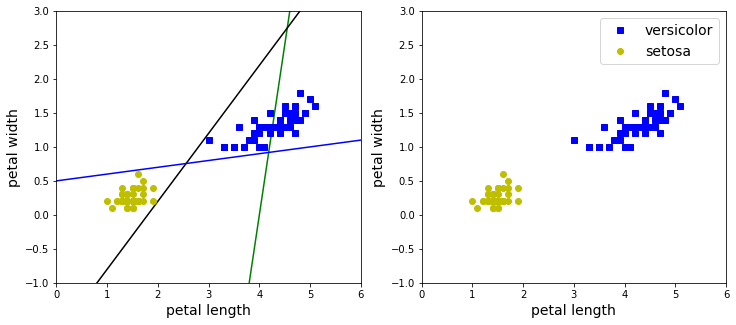

In [57]:
# lets build some bad classifier manually 
x0 = np.linspace(0,7,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(x0, pred_1, "g-")
plt.plot(x0, pred_2, "k-")
plt.plot(x0, pred_3, "b-")
plt.plot(x[:,0][y==1], x[:,1][y==1], "bs", label = "versicolor")
plt.plot(x[:,0][y==0], x[:,1][y==0], "yo", label = "setosa")
plt.xlabel("petal length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.axis([0,6,-1,3])

# lets plot out svm classfier
plt.subplot(122)
plot_svm_decision_boundary(svm_clf, 0, 6)
plot_data_points(x,y)
plt.axis([0,6,-1,3])
plt.legend(loc = "best", fontsize = 14)
plt.show()

SVM are sensitive to feature scalling

Text(0.5, 1.0, 'Scaled')

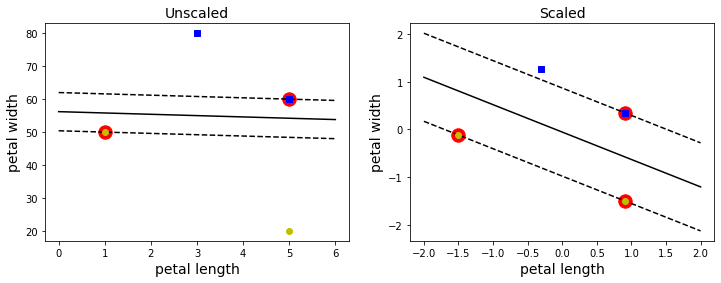

In [62]:
# lets cheak for some random data 
xs = np.array([[1, 50], [5,20], [3,80], [5,60]])
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel = "linear", C = 100)
svm_clf.fit(xs,ys)

plt.figure(figsize = (12,4))
plt.subplot(121)
plot_svm_decision_boundary(svm_clf, 0, 6)
plot_data_points(xs, ys)
plt.title("Unscaled", fontsize = 14)

# applying feature scaling and check 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(xs)
svm_clf.fit(x_scaled, ys)

plt.subplot(122)
plot_svm_decision_boundary(svm_clf,-2,2)
plot_data_points(x_scaled, ys)
plt.title("Scaled", fontsize = 14)

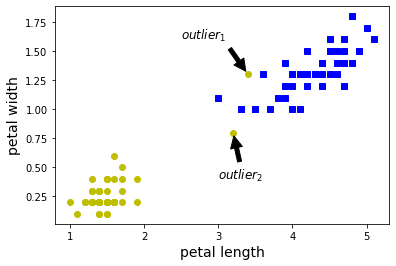

In [106]:
x_outlier = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outlier = np.array([0,0])
x_new = np.concatenate([x,x_outlier[:2]], axis = 0)
y_new = np.concatenate([y,y_outlier])
plot_data_points(x_new, y_new)
plt.annotate("$outlier_{1}$", xy = (x_outlier[0][0], x_outlier[0][1]),
            xytext = (2.5, 1.6), arrowprops = dict(facecolor = "black", shrink=0.1), fontsize = 12)
plt.annotate("$outlier_{2}$", xy = (x_outlier[1][0], x_outlier[1][1]),
               xytext = (3,0.4), arrowprops = dict(facecolor = "black", shrink = 0.1),fontsize = 12)
plt.show()

[0.5, 5.5, -1, 3]

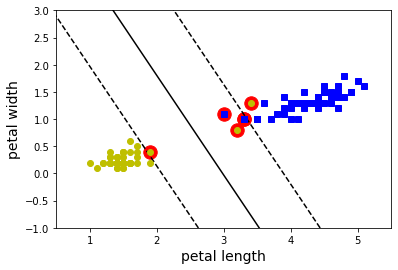

In [111]:
# svm classifier with outliers

svm_clf1 = SVC(kernel = "linear")
svm_clf1.fit(x_new,y_new)

plot_svm_decision_boundary(svm_clf1, 0,6)
plot_data_points(x_new, y_new)
plt.axis([0.5,5.5,-1,3])

In [151]:
# SVC for binary classification (whether its virginica or not)

from sklearn.pipeline import Pipeline


iris = datasets.load_iris()
x = iris["data"][:,(2,3)] # petal width and petal length
y = (iris["target"] == 2).astype(np.float)
svm_clf1 = SVC(kernel = "linear", C = 1, random_state = 29)
svm_clf2 = SVC(kernel = "linear", C = 100, random_state = 29)

svm_clf1_scaled = Pipeline([("scaler", StandardScaler()),
                     ("linearsvc", svm_clf1)])
svm_clf2_scaled = Pipeline([("scaler", StandardScaler()), 
                      ("linearsvc", svm_clf2)])
svm_clf1_scaled.fit(x,y)
svm_clf2_scaled.fit(x,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=29, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0.5, 1.0, 'C = 100')

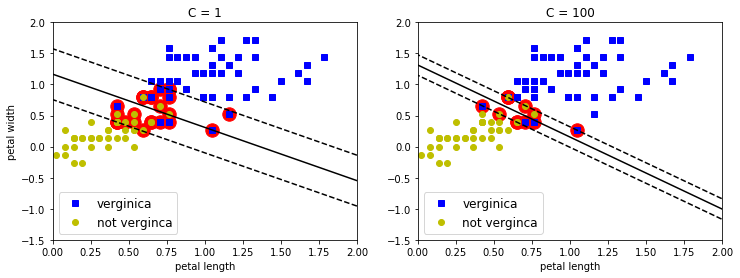

In [161]:
x_scaled = scaler.fit_transform(x)
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot(x_scaled[:,0][y == 1], x_scaled[:,1][y==1], "bs", label = "verginica")
plt.plot(x_scaled[:,0][y==0], x_scaled[:,1][y==0], "yo", label = "not verginca")
plot_svm_decision_boundary(svm_clf1, -2,2)
plt.axis([0,2,-1.5,2])
plt.legend(fontsize = 12)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("C = {}".format(1))
plt.subplot(122)
plt.plot(x_scaled[:,0][y == 1], x_scaled[:,1][y==1], "bs", label = "verginica")
plt.plot(x_scaled[:,0][y==0], x_scaled[:,1][y==0], "yo", label = "not verginca")
plot_svm_decision_boundary(svm_clf2, -2,2)
plt.axis([0,2,-1.5,2])
plt.legend(fontsize = 12)
plt.xlabel("petal length")
plt.title("C = {}".format(100))

# Nonliear SVM classifier

In [2]:
from sklearn.datasets import make_moons
make_moons

<function sklearn.datasets.samples_generator.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)>

In [3]:
x, y = make_moons(n_samples = 100, noise = 0.15, random_state = 29)

In [5]:
x.shape

(100, 2)

In [7]:
y

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [18]:
def plot_make_moons_dataset(x, y):
    plt.plot(x[:,0][y==0], x[:,1][y==0], "bs")
    plt.plot(x[:,0][y==1], x[:,1][y==1], "g^")
    plt.grid(True, which = "both")
    plt.xlabel("$x_{1}$", fontsize = 12)
    plt.ylabel("$x_{2}$", fontsize = 12)


[-1.5, 2.5, -1, 1.5]

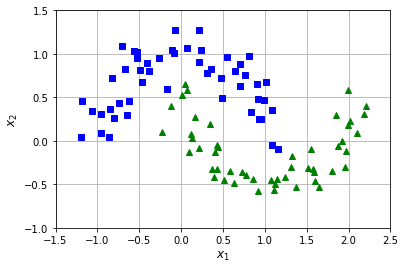

In [24]:
plot_make_moons_dataset(x,y)
plt.axis([-1.5, 2.5, -1, 1.5])

In [25]:
# classification using polynomial features

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree = 3)),
                              ("scaler", StandardScaler()),
                              ("svm_clf", LinearSVC(C = 10, loss = "hinge"))])

polynomial_svm_clf.fit(x,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [44]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) # coverts (x,y) coordinates into matrix of coordinates
    
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

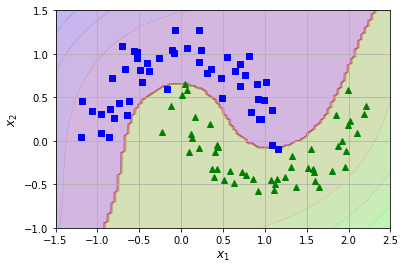

In [49]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_make_moons_dataset(x, y)
plt.show()

In [51]:
# using polynomial kernal

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))

poly_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [53]:
poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly100_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

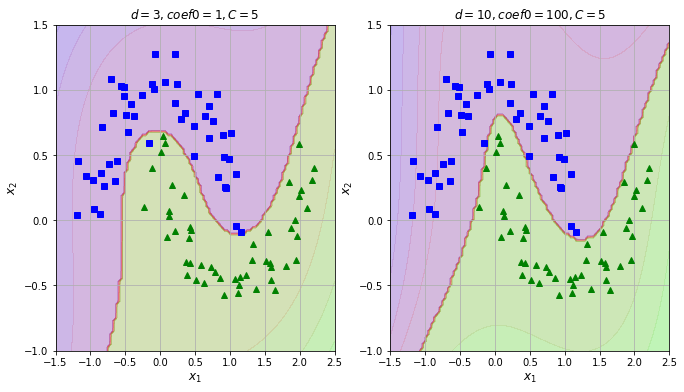

In [55]:
plt.figure(figsize=(11,6))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_make_moons_dataset(x, y)
plt.title(r"$d=3, coef0=1, C=5$", fontsize=12)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_make_moons_dataset(x, y)
plt.title(r"$d=10, coef0=100, C=5$", fontsize=12)

plt.show()

In [56]:
# using rbf kernel
rbf_svm_clf = Pipeline([("scaler", StandardScaler()),
                       ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))])
rbf_svm_clf.fit(x,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

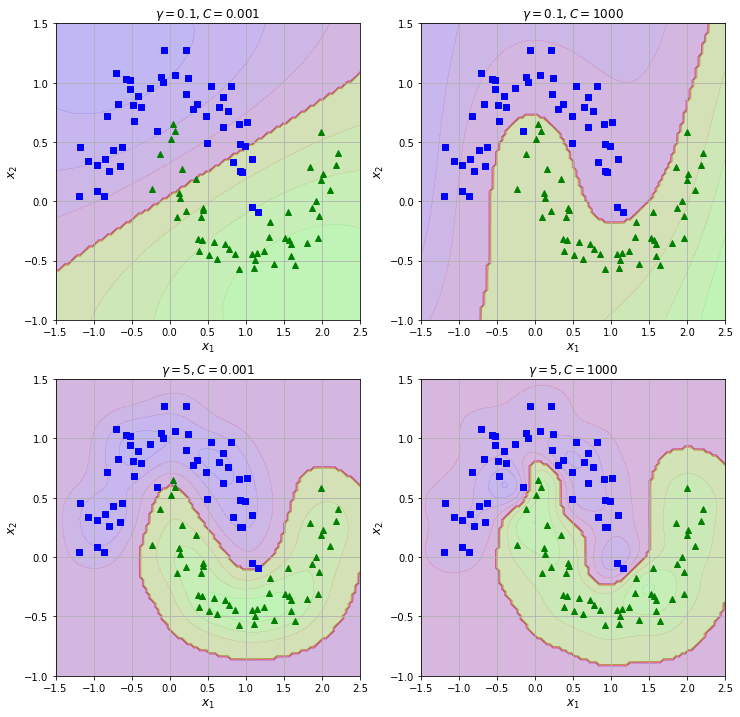

In [72]:
# at different gamma and c hyperparameters

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperpamas = [(gamma1,C1), (gamma1,C2), (gamma2,C1), (gamma2,C2)]
plt.figure(figsize= (12,12))
svm_clfs = []
for i in hyperpamas:
    rbf_svm_clf = Pipeline([("scaler", StandardScaler()),
                           ("svm_clf", SVC(kernel = "rbf", gamma= i[0], C = i[1]))])
    rbf_svm_clf.fit(x,y)
    svm_clfs.append(rbf_svm_clf)

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5,2.5,-1,1.5])
    plot_make_moons_dataset(x,y)
    
    plt.title("$\gamma = {}, C = {}$".format(hyperpamas[i][0],hyperpamas[i][1]))
plt.show()

# SVM regression

In [83]:
np.random.seed(29)

m = 50
x = 4 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

In [84]:
y.shape

(50,)

In [85]:
x.shape

(50, 1)

In [87]:
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon = 1.5, random_state=29)
svm_reg2 = LinearSVR(epsilon = 0.5, random_state=29)

svm_reg1.fit(x,y)
svm_reg2.fit(x,y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=29, tol=0.0001, verbose=0)

In [90]:
def find_off_margin_points(svm_reg, x,y):
    y_pred = svm_reg.predict(x)
    off_margin = np.abs(y - y_pred) >= svm_reg.epsilon
    return np.argwhere(off_margin)

svm_reg1.support_ = find_off_margin_points(svm_reg1,x,y)
svm_reg2.support_ = find_off_margin_points(svm_reg2,x,y)

In [101]:
def plot_svm_regression(svm_reg, x, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
    y_predict = svm_reg.predict(x1s)
    plt.plot(x1s, y_predict, "k-")
    plt.plot(x1s, y_predict + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_predict - svm_reg.epsilon, "k--")
    plt.scatter(x[svm_reg.support_], y[svm_reg.support_], s=100, facecolor = "red")
    plt.plot(x,y, "bo")
    plt.xlabel("$x$", fontsize = 14)
    
    plt.xlabel("$y$", fontsize = 14)
    plt.axis(axes)

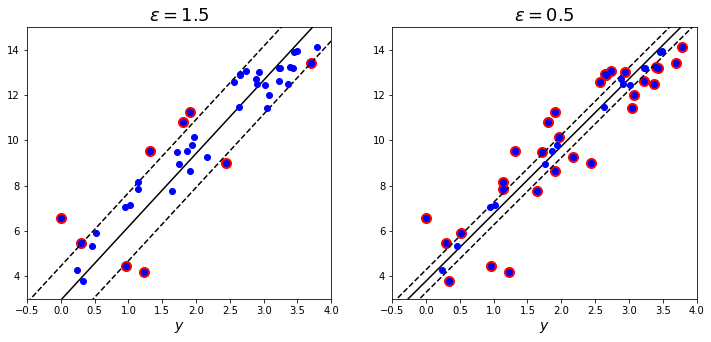

In [108]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plot_svm_regression(svm_reg1, x, y, [-0.5, 4, 3, 15])
plt.title("$\epsilon = {}$".format(svm_reg1.epsilon), fontsize = 18)
plt.subplot(122)
plot_svm_regression(svm_reg2, x, y, [-0.5, 4, 3, 15])
plt.title("$\epsilon = {}$".format(svm_reg2.epsilon), fontsize = 18)
plt.show()

In [127]:
# polynomial regression
np.random.seed(29)
m = 100
x = 2 * np.random.rand(m,1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.rand(m,1)/10).ravel()
x.shape

(100, 1)

In [128]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x, y)

C:\Users\davat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

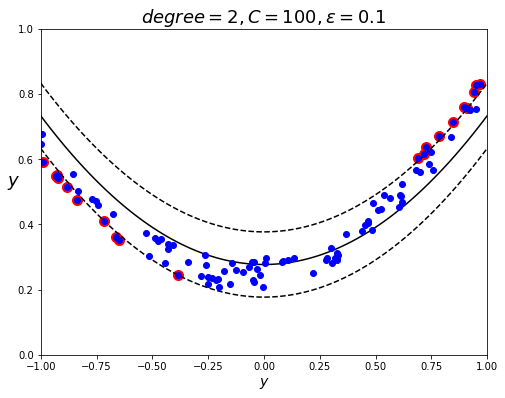

In [129]:
plt.figure(figsize=(8,6))
plot_svm_regression(svm_poly_reg, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg.degree, svm_poly_reg.C, svm_poly_reg.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.show()

In [131]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(x, y)
svm_poly_reg2.fit(x, y)

C:\Users\davat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\davat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

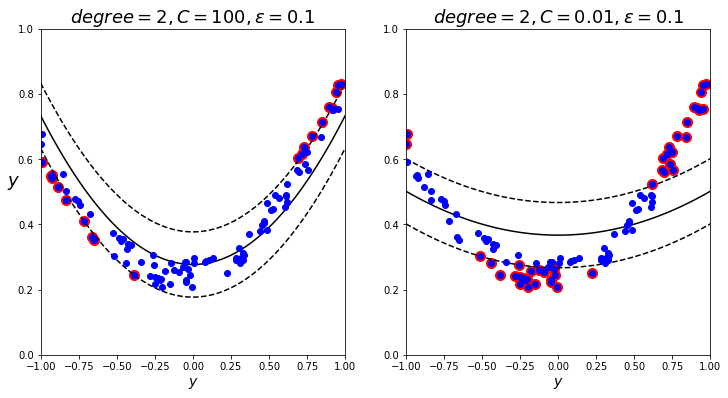

In [133]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()